In [1]:
from pathlib import Path
import sys

parent_dir = Path().resolve().parent
sys.path.append(str(parent_dir))

import numpy as np
import pandas as pd
from models.ensemble import TME_ensemble
from models.tme import deses                  
from models.tme import rmse, mae, mape, iw, nnll   
from data.preprocess import read_txn_data , preprocess_txn_data, compute_lob_features, \
    create_lob_dataset, merge_txn_and_lob
from models.deseasonalization import deses


In [2]:
cfg = {
    "data_split": {
        "train_size": 0.7,
        "validation_size": 0.1
    },
    "model_params": {
        "n_models": 10,
        "horizon": 100,
        "batch_size": 4096,
        "learning_rate": 0.001,
        "epochs": 10,
        "l2_lambda": 0.01  # L2 regularization strength
    }
}

# 1 min

trx Data loaded successfully.
preprocessed lob Data loaded successfully.

Training model 1/10
ep01  train 4.8651  val 4.6547
ep02  train 3.9178  val 3.0693
ep03  train 3.4140  val 2.8737
ep04  train 3.2426  val 2.8323
ep05  train 3.1489  val 2.7878
ep06  train 3.0763  val 2.7628
ep07  train 3.0160  val 2.7399
ep08  train 2.9665  val 2.7212
ep09  train 2.9213  val 2.7054
ep10  train 2.8825  val 2.6882

Training model 2/10
ep01  train 4.9398  val 4.9739
ep02  train 3.9465  val 3.0823
ep03  train 3.3958  val 2.8675
ep04  train 3.2356  val 2.8271
ep05  train 3.1407  val 2.7961
ep06  train 3.0710  val 2.7680
ep07  train 3.0156  val 2.7431
ep08  train 2.9636  val 2.7251
ep09  train 2.9197  val 2.7025
ep10  train 2.8814  val 2.6812

Training model 3/10
ep01  train 4.8333  val 4.4224
ep02  train 3.8041  val 3.0287
ep03  train 3.3631  val 2.8628
ep04  train 3.2166  val 2.8192
ep05  train 3.1264  val 2.7827
ep06  train 3.0568  val 2.7598
ep07  train 3.0006  val 2.7346
ep08  train 2.9531  val 2.7

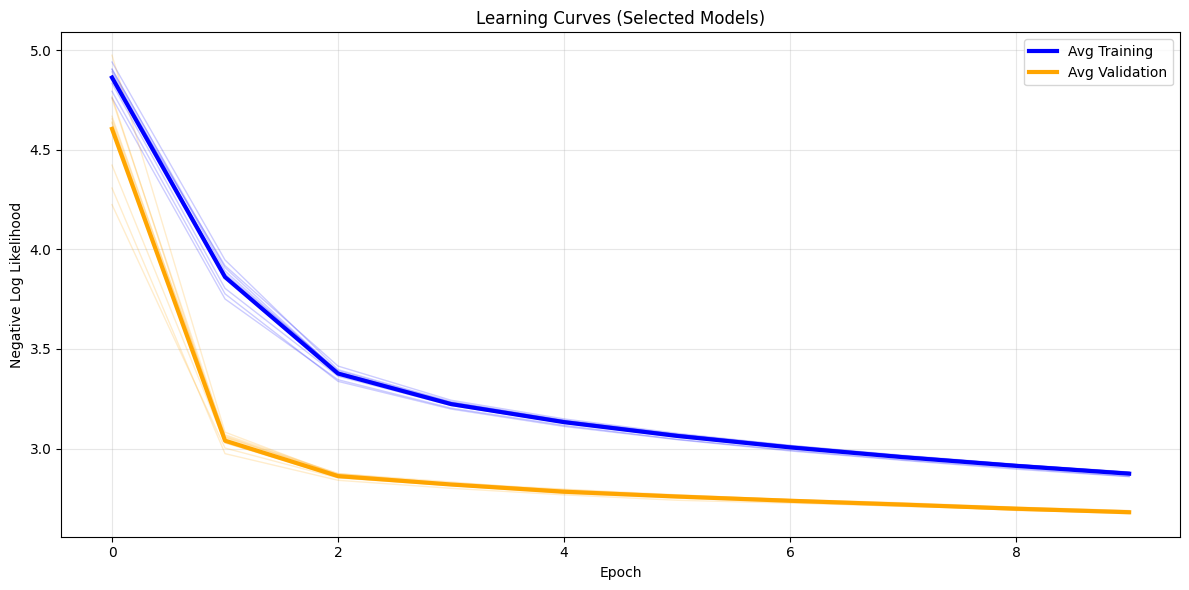

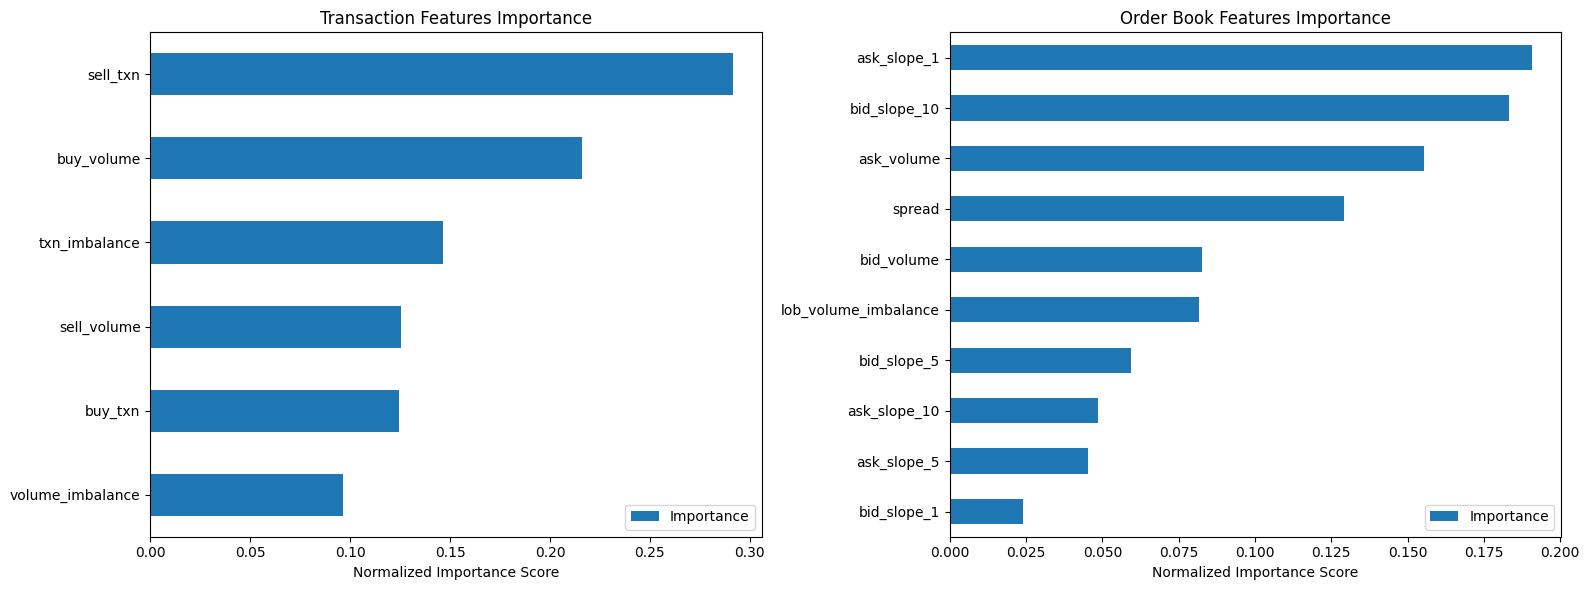

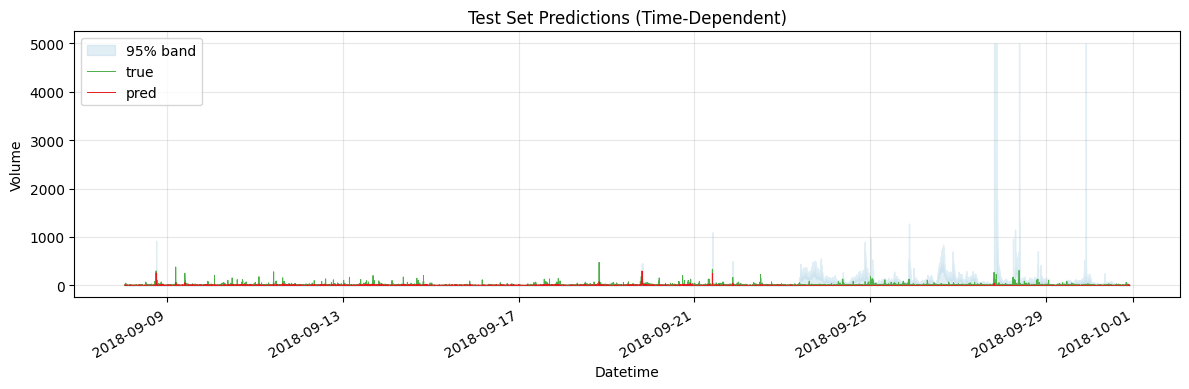

Metric     |      Value
-----------------------
RMSE         |      11.73
MAE           |       4.43
R²             |     0.0107
MAPE (%)  |     187.57
Coverage  |       80.4 %
IW             |      51.04
NNLL         |     4.9464


(array([1.61345043e-03, 5.79489520e-01, 1.00035343e-03, ...,
        1.52989072e+00, 9.35145751e-01, 9.83765599e-01]),
 array([6.90637896, 2.95877713, 2.69808932, ..., 3.49237734, 3.11603979,
        2.03175483]))

In [3]:


freq='1min'
trx_df = read_txn_data(use_load=False)
lob_df = create_lob_dataset(use_load=False)
trx_df = preprocess_txn_data(trx_df,freq, fill_missing_ts=False)
df_raw = merge_txn_and_lob(trx_df, lob_df)

tme = TME_ensemble(df_raw, cfg)
tme.train()

# New visualization methods
tme.plot_learning_curves() 
tme.plot_variable_importance()

# Evaluation
tme.evaluate()

# 5 min

trx Data loaded successfully.
preprocessed lob Data loaded successfully.

Training model 1/10
ep01  train 2.4194  val 3.0583
ep02  train 2.3935  val 2.9804
ep03  train 2.3529  val 2.8606
ep04  train 2.2937  val 2.7024
ep05  train 2.2151  val 2.5275
ep06  train 2.1468  val 2.3713
ep07  train 2.0730  val 2.2659
ep08  train 2.0345  val 2.2198
ep09  train 2.0057  val 2.2104
ep10  train 1.9843  val 2.2150

Training model 2/10
ep01  train 2.3997  val 3.0636
ep02  train 2.3946  val 2.9972
ep03  train 2.3283  val 2.8933
ep04  train 2.3015  val 2.7514
ep05  train 2.2270  val 2.5811
ep06  train 2.1619  val 2.4125
ep07  train 2.1004  val 2.2846
ep08  train 2.0523  val 2.2190
ep09  train 2.0367  val 2.1987
ep10  train 2.0017  val 2.1989

Training model 3/10
ep01  train 2.4139  val 3.0469
ep02  train 2.3832  val 2.9550
ep03  train 2.3276  val 2.8234
ep04  train 2.2889  val 2.6592
ep05  train 2.1823  val 2.4848
ep06  train 2.1209  val 2.3399
ep07  train 2.0793  val 2.2481
ep08  train 2.0297  val 2.2

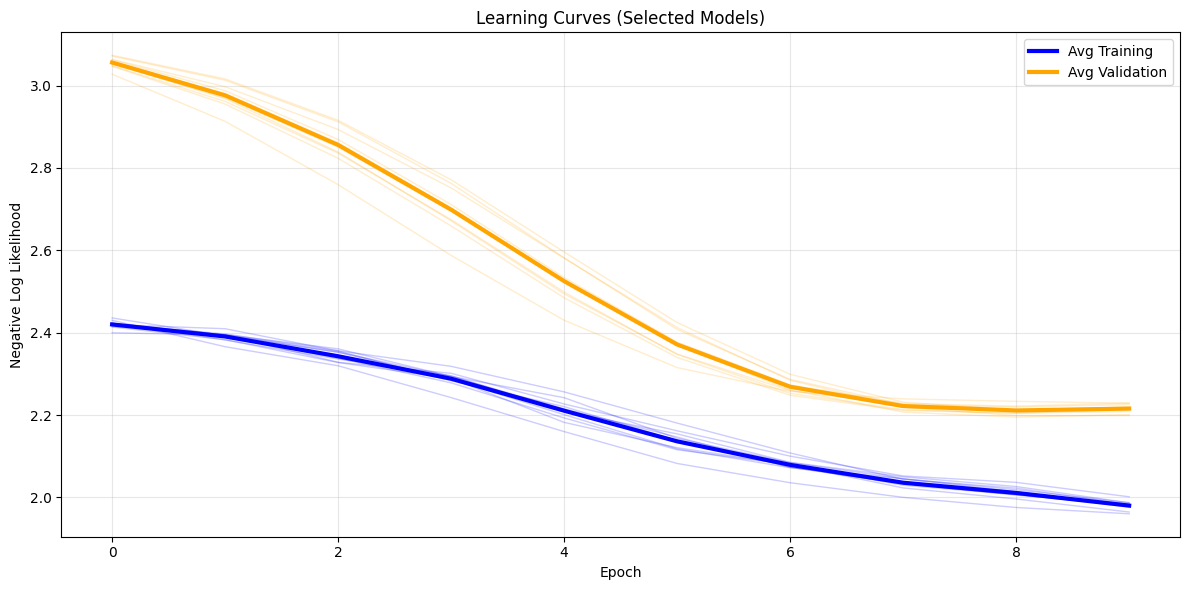

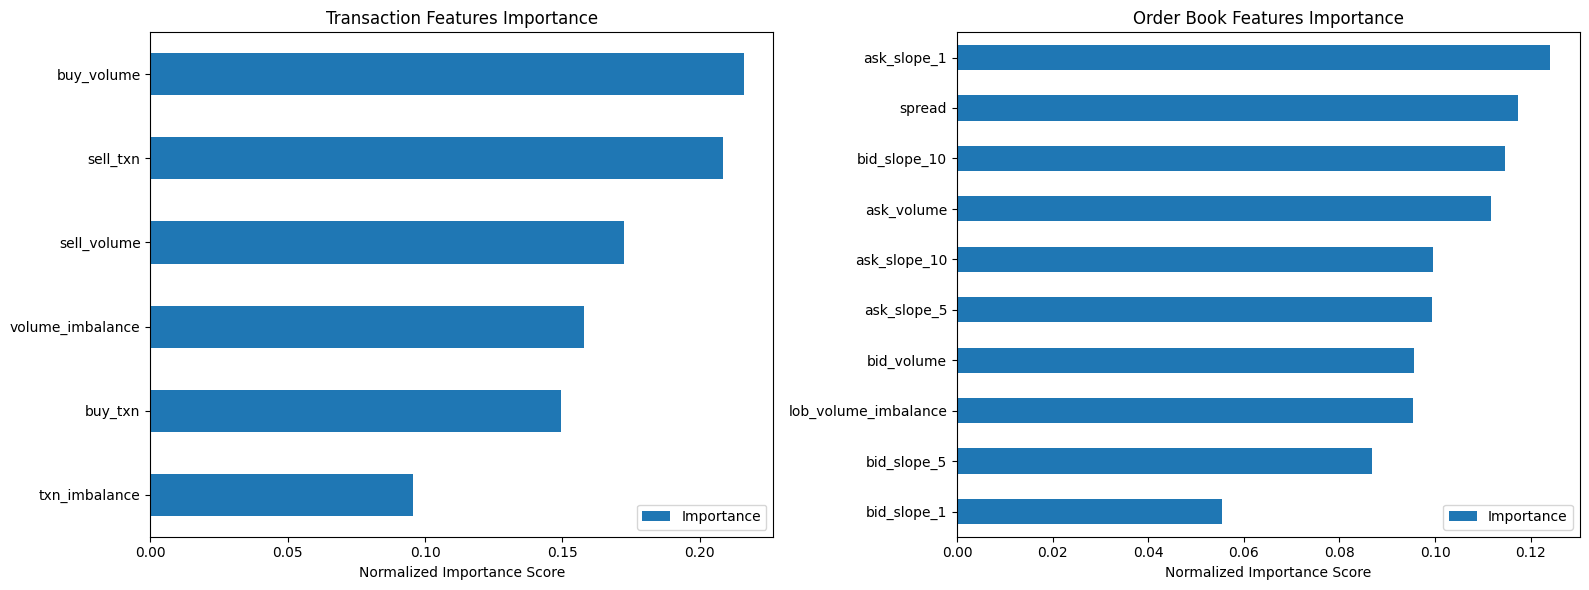

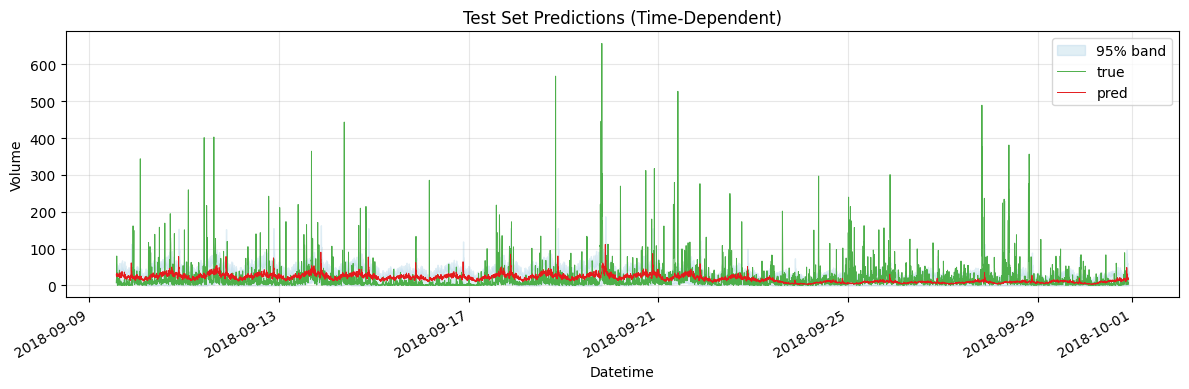

Metric     |      Value
-----------------------
RMSE         |      35.78
MAE           |      18.68
R²             |    -0.0266
MAPE (%)  |     432.49
Coverage  |       76.0 %
IW             |      39.69
NNLL         |     2.8889


(array([ 6.93566508, 15.83377776,  8.48661181, ...,  2.35188444,
         7.64728898,  4.93160051]),
 array([28.57560687, 28.53195259, 24.69248114, ..., 19.16249927,
        15.94104801, 19.18855108]))

In [4]:


freq='5min'
trx_df = read_txn_data(use_load=False)
lob_df = create_lob_dataset(use_load=False)
trx_df = preprocess_txn_data(trx_df,freq, fill_missing_ts=False)
df_raw = merge_txn_and_lob(trx_df, lob_df)

tme = TME_ensemble(df_raw, cfg)
tme.train()

# New visualization methods
tme.plot_learning_curves() 
tme.plot_variable_importance()

# Evaluation
tme.evaluate()



# 10 min

trx Data loaded successfully.
preprocessed lob Data loaded successfully.

Training model 1/10
ep01  train 1.9219  val 2.2060
ep02  train 1.9141  val 2.1932
ep03  train 1.9023  val 2.1766
ep04  train 1.8923  val 2.1556
ep05  train 1.8781  val 2.1301
ep06  train 1.8607  val 2.0999
ep07  train 1.8575  val 2.0654
ep08  train 1.8291  val 2.0280
ep09  train 1.8240  val 1.9887
ep10  train 1.7986  val 1.9497

Training model 2/10
ep01  train 1.9169  val 2.2089
ep02  train 1.9150  val 2.1994
ep03  train 1.9074  val 2.1865
ep04  train 1.8983  val 2.1695
ep05  train 1.8854  val 2.1482
ep06  train 1.8691  val 2.1221
ep07  train 1.8538  val 2.0917
ep08  train 1.8469  val 2.0581
ep09  train 1.8265  val 2.0213
ep10  train 1.8130  val 1.9834

Training model 3/10
ep01  train 1.9192  val 2.2054
ep02  train 1.9130  val 2.1917
ep03  train 1.9029  val 2.1743
ep04  train 1.9005  val 2.1526
ep05  train 1.8778  val 2.1266
ep06  train 1.8693  val 2.0963
ep07  train 1.8479  val 2.0622
ep08  train 1.8303  val 2.0

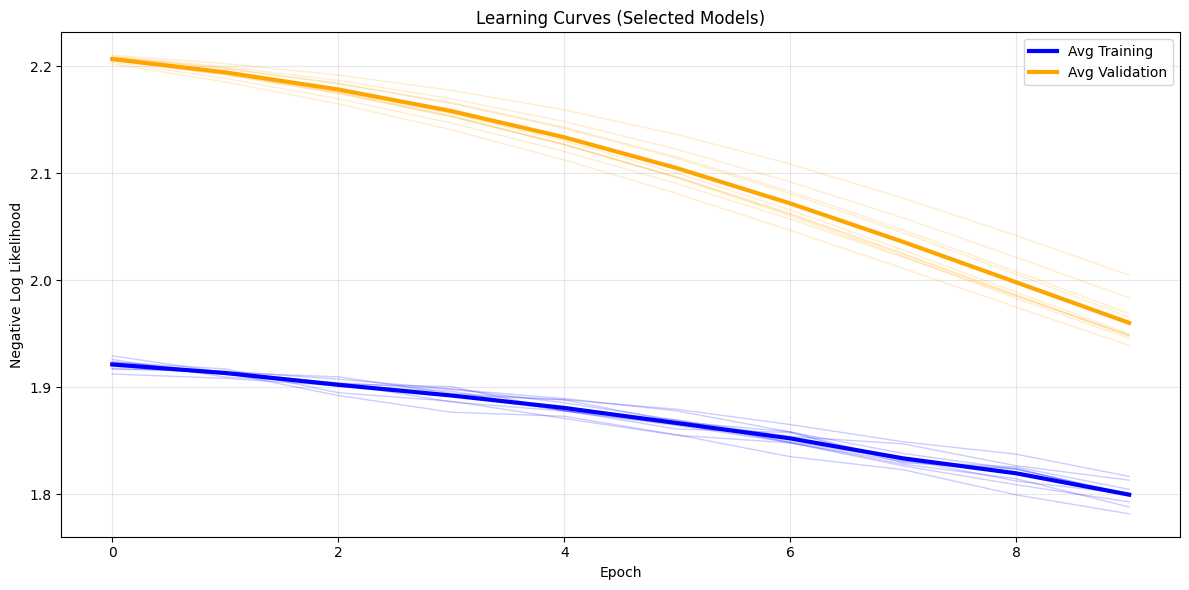

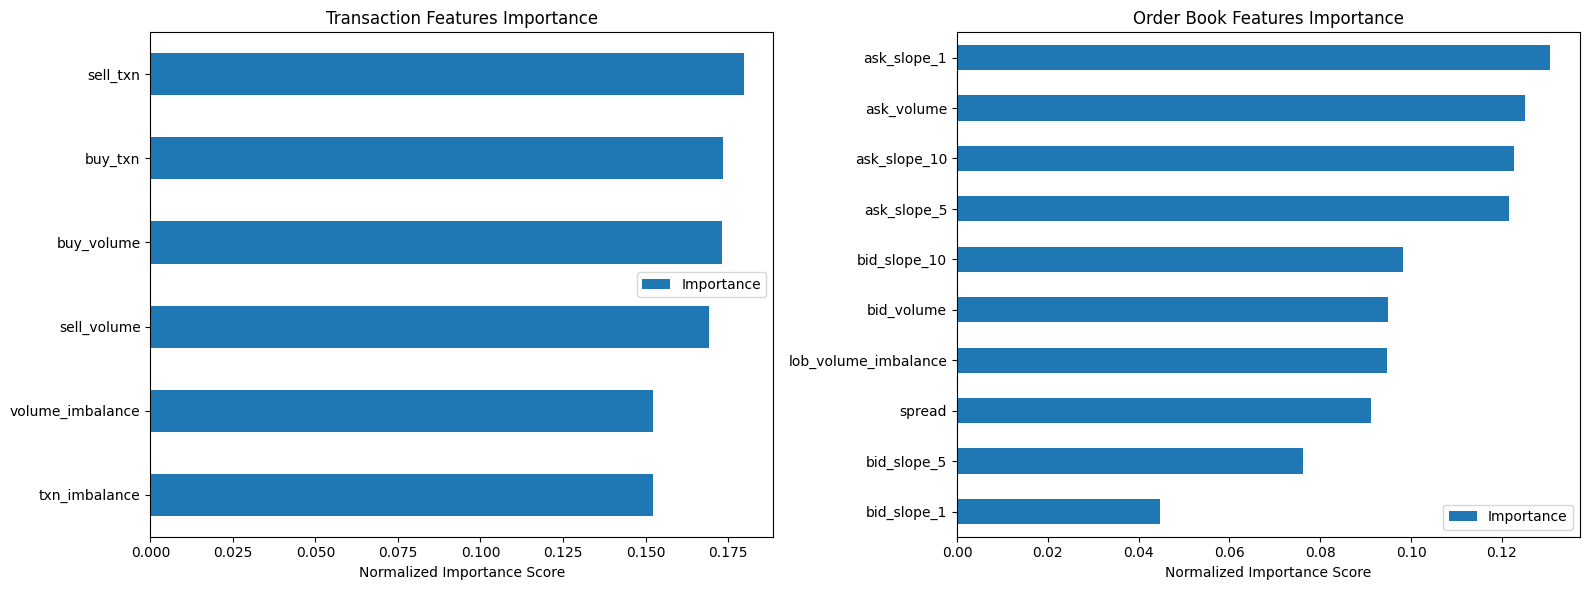

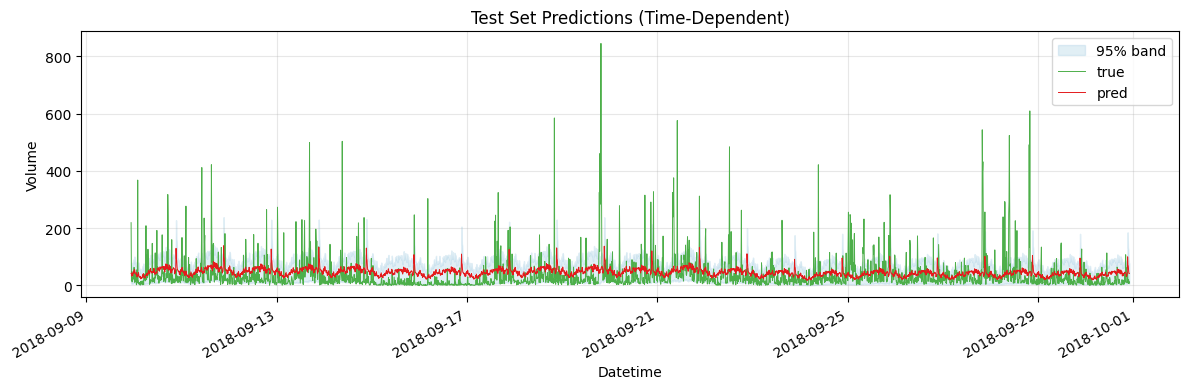

Metric     |      Value
-----------------------
RMSE         |      58.30
MAE           |      35.85
R²             |    -0.0061
MAPE (%)  |     465.24
Coverage  |       68.5 %
IW             |      74.97
NNLL         |     2.4245


(array([219.10196249,  16.76405125,  48.48693492, ...,  19.63661188,
          6.01488119,  12.57888856]),
 array([41.79180823, 43.59406872, 33.91436091, ..., 50.87662075,
        41.63707603, 41.53103205]))

In [5]:


freq='10min'
trx_df = read_txn_data(use_load=False)
lob_df = create_lob_dataset(use_load=False)
trx_df = preprocess_txn_data(trx_df,freq, fill_missing_ts=False)
df_raw = merge_txn_and_lob(trx_df, lob_df)

tme = TME_ensemble(df_raw, cfg)
tme.train()

# New visualization methods
tme.plot_learning_curves() 
tme.plot_variable_importance()

# Evaluation
tme.evaluate()


# Cross Validation 

In [6]:
freq='10min'
trx_df = read_txn_data(use_load=False)
lob_df = create_lob_dataset(use_load=False)
trx_df = preprocess_txn_data(trx_df,freq, fill_missing_ts=False)
df_raw = merge_txn_and_lob(trx_df, lob_df)
df_deses, _ = deses(df_raw)

trx Data loaded successfully.
preprocessed lob Data loaded successfully.


C:\Users\peter\.0\codes\eth\Komplex\Final\models\deseasonalization.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rest['mean_volume'].replace(0, 1e-8, inplace=True)



=== Training Fold 1/2 ===

Training model 1/10
ep01  train 3.4180  val 1.6381
ep02  train 2.6117  val 1.5021
ep03  train 3.1410  val 1.4684

Training model 2/10
ep01  train 3.5337  val 1.3885
ep02  train 2.8503  val 1.9405
ep03  train 3.2745  val 1.6979

Training model 3/10
ep01  train 3.2454  val 1.5441
ep02  train 2.6633  val 2.0545
ep03  train 3.4011  val 1.3919

Training model 4/10
ep01  train 3.4950  val 1.9405
ep02  train 2.8563  val 1.9472
ep03  train 3.8558  val 1.5125

Training model 5/10
ep01  train 3.8728  val 1.7792
ep02  train 3.4378  val 1.5308
ep03  train 3.3938  val 1.4664

Training model 6/10
ep01  train 3.1054  val 1.5034
ep02  train 2.8037  val 1.7438
ep03  train 3.2622  val 1.6495

Training model 7/10
ep01  train 3.1751  val 1.5883
ep02  train 2.4150  val 1.4531
ep03  train 3.2736  val 1.5071

Training model 8/10
ep01  train 3.5283  val 1.3987
ep02  train 2.2477  val 1.9103
ep03  train 3.2577  val 1.3852

Training model 9/10
ep01  train 3.1921  val 1.5550
ep02  tra

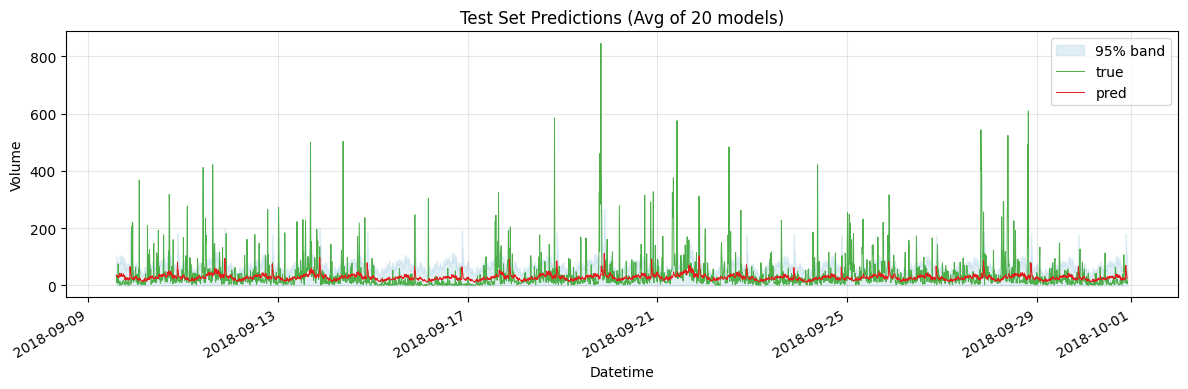

Metric     |      Value
-----------------------
RMSE         |      57.10
MAE           |      27.01
R²             |     0.0252
MAPE (%)  |     254.26
Coverage  |       88.7 %
IW             |      68.16
NNLL         |     1.7251


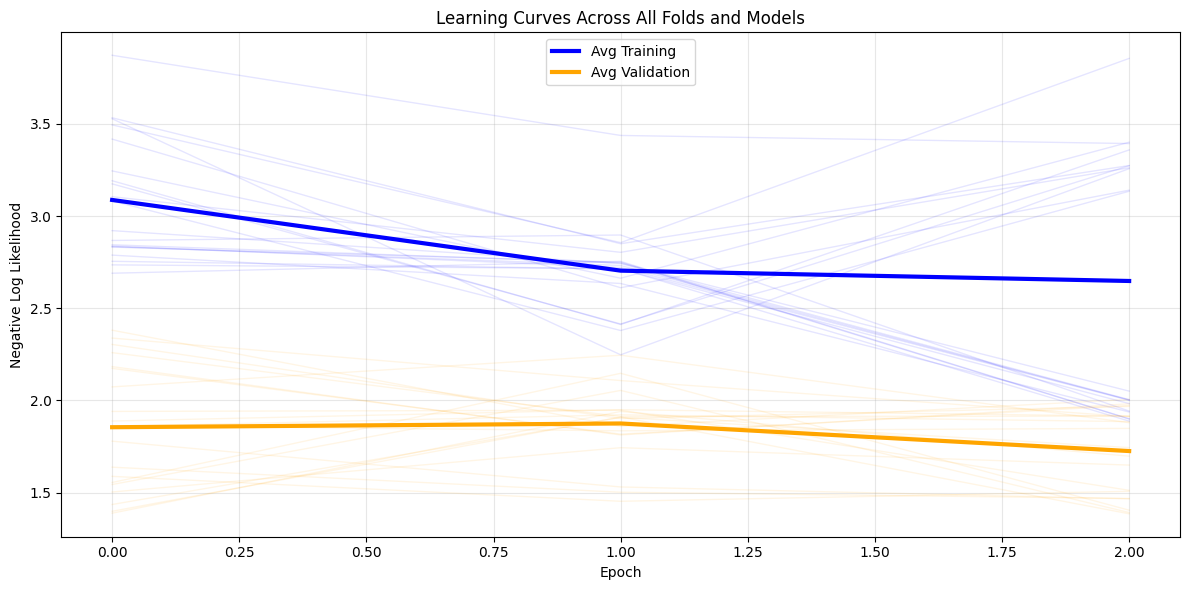

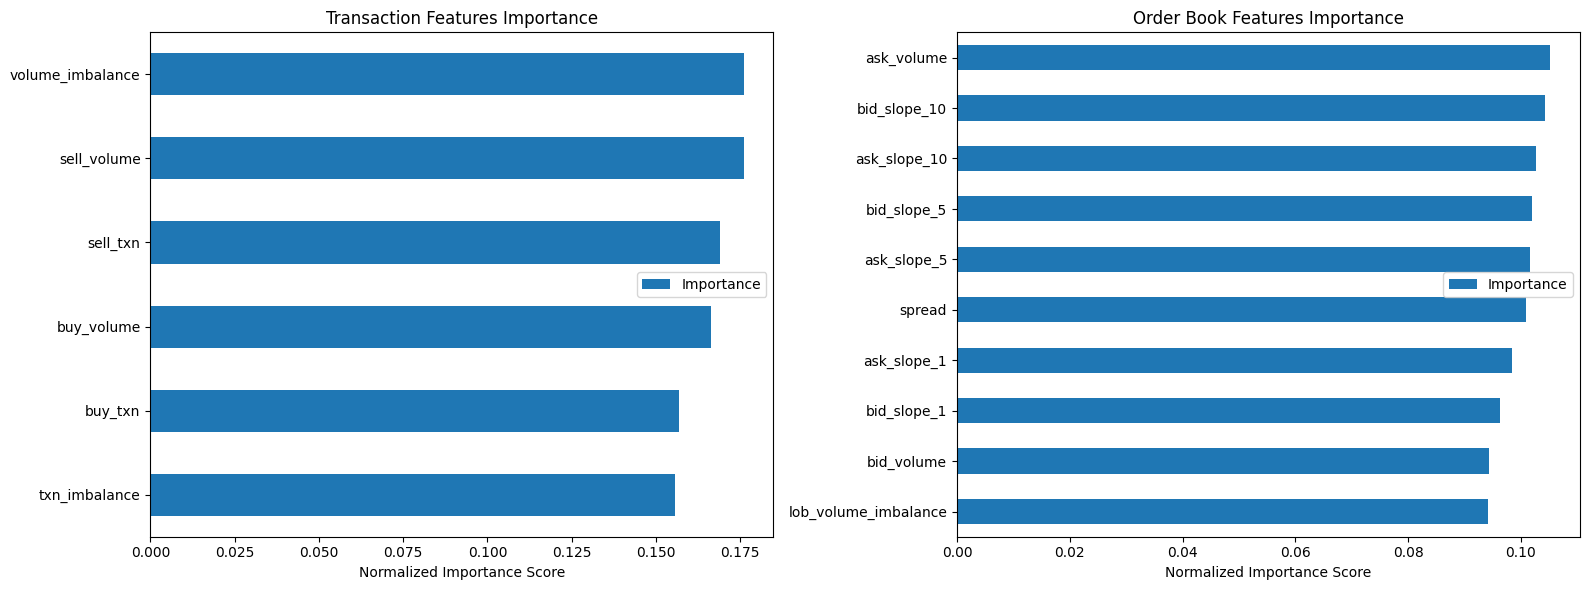

In [7]:
from models.ensemble_cv import TME_ensemble_CV


cfg = {
    "data_split": {
        "n_splits": 2,
        "test_size": 0.2
    },
    "model_params": {
        "horizon": 50,
        "batch_size": 4096,
        "learning_rate": 0.1,
        "epochs": 3,
        "n_models": 10,
        "l2_lambda": 0.1
    }
}


# Initialize and train
model = TME_ensemble_CV(df_deses, cfg)
model.train()

# Evaluate and visualize
y_true, y_pred = model.evaluate()
model.plot_learning_curves()
model.plot_variable_importance()

# Save model
#model.save("tme_ensemble_cv.pth")

# Later load and use
# loaded_model = TME_ensemble_CV.load("tme_ensemble_cv.pth", df)